# Lead Scoring Case Study

## **Problem Statement**

X Education, an online course provider for industry professionals, attracts potential learners through marketing efforts on various websites and search engines like Google. Visitors to the website can browse courses, watch videos, or fill out a form with their email or phone number, at which point they are classified as leads. Additionally, the company acquires leads through past referrals.  

Once leads are generated, the sales team engages with them via calls and emails to drive conversions. However, only about 30% of leads typically convert into paying customers.  

## **Objective**

Develop a logistic regression model to identify high-potential leads ("Hot Leads") and generate a **Lead Score** (probability value × 100). This scoring system will help the business prioritize leads, improving the overall conversion rate.


In [ ]:
# Import required libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Read and Understand the Data

In [ ]:
# Load the dataset
leads_df = pd.read_csv('Leads.csv')
df0 = leads_df.copy()
df0.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [ ]:
# Check the shape
df0.shape

(9240, 37)

In [ ]:
# Check the df info
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
# Check the statistics
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


# Basic Data Cleanup

In [ ]:
# Check for the duplicate rows in our dataset
df0['Lead Number'].nunique()

9240

No duplicate entries found in the dataset.

In [ ]:
# Create a printing function for classes and their proportions for all object columns in a dataframe

def print_classes(df, exclude_col=[]):
    object_columns= df.select_dtypes(include=['O']).columns.tolist()
    if len(exclude_col) > 0:
        object_columns= list(set(object_columns) - set(exclude_col))
    for column in object_columns:
        print('*'*100)
        print('Unique Values in column : ',column)
        print('*'*100)
        print(df[column].value_counts(normalize= True, dropna= False))

# Check the count of unique values in every object columns of df0
print_classes(df0, ['Prospect ID','Lead Number'])

****************************************************************************************************
Unique Values in column :  Get updates on DM Content
****************************************************************************************************
Get updates on DM Content
No    1.0
Name: proportion, dtype: float64
****************************************************************************************************
Unique Values in column :  Lead Source
****************************************************************************************************
Lead Source
Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Liv

### Handling 'Select' in different columns

In the dataset, the value **'Select'** appears as a category in multiple columns, including:  

1. **Specialization**  
2. **How did you hear about X Education**  
3. **Lead Profile**  
4. **City**  

Since **'Select'** is not a meaningful category, it is likely the default value in the dropdown menu. If a user did not choose an option, the value remained as **'Select'** instead of being left blank.  

To handle this, we will replace **'Select'** with **NaN** to treat it as missing data.

In [ ]:
# Replace 'Select' with np.nan in dataset

df0.replace({'Select': np.nan}, inplace = True)
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
df0.dtypes

,0
Prospect ID,object
Lead Number,int64
Lead Origin,object
Lead Source,object
Do Not Email,object
Do Not Call,object
Converted,int64
TotalVisits,float64
Total Time Spent on Website,int64
Page Views Per Visit,float64


### Checking columns having no variance, high missing value

In [ ]:
# Check the columns having no variance i.e. with only one unique value

one_unique= df0.nunique()== 1
no_var_cols= one_unique[one_unique].index

## **Dropping Low-Variance Columns**  

The following columns have **only one unique value** and **no missing data**, meaning they provide **no variance** and are **not useful** for EDA or model building:  

- **'Magazine'**  
- **'Receive More Updates About Our Courses'**  
- **'Update me on Supply Chain Content'**  
- **'Get updates on DM Content'**  
- **'I agree to pay the amount through cheque'**  

### **Action Taken:**  
- Dropping these columns to improve model efficiency.  


In [ ]:
# Firstly remove the columns that have no missing value and only 1 unique value.

df0.drop(no_var_cols, axis=1, inplace=True)

# Check the percentage of NA value in different columns

round(df0.isna().sum() * 100/ df0.shape[0], 2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


## **Dropping Columns with High Missing Values**  

The following columns have more than **40% missing data**, making them less reliable for analysis. Hence, we will drop these columns:  

1. **'How did you hear about X Education'** – 78.46% missing data  
2. **'Lead Profile'** – 74.19% missing data  
3. **'Lead Quality'** – 51.6% missing data  
4. **Asymmetrique Columns:**  
   - **'Asymmetrique Activity Index'**  
   - **'Asymmetrique Profile Index'**  
   - **'Asymmetrique Activity Score'**  
   - **'Asymmetrique Profile Score'**  
   These columns have **45.65% missing data** and will also be removed.  

By dropping these columns, we ensure a cleaner dataset for model training.


In [ ]:
# Drop columns having very high missing value

high_missing_cols = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
df0.drop(high_missing_cols, axis = 1, inplace = True)
df0.shape

(9240, 25)

In [ ]:
# Check if any observation has more than 70% missing data

row_check= round(df0.isna().sum(axis = 1) * 100/ df0.shape[1], 2) > 70
row_check[row_check]

,0


There is no datapoint/ observation in our dataset having more than 70% missing values.

In [ ]:
# Convert Lead Number into object data type

df0['Lead Number'] = df0['Lead Number'].astype('object')

### Check categorical columns having high no. of categories

## **Handling Categorical Variables & Missing Values**  

Next, we will analyze all **categorical columns** and perform the following steps:  

1. **Re-grouping Classes:**  
   - Merge similar categories where necessary to ensure meaningful segmentation.  

2. **Imputing Missing Values:**  
   - Use **Business Knowledge** to fill missing values where applicable.  
   - If statistical imputation is required, it will be performed **after EDA and Train-Test Split** to prevent data leakage.  

This approach ensures better data quality and model reliability.

In [ ]:
# Check the number of unique values in object columns

print_classes(df0, ['Prospect ID','Lead Number'])

****************************************************************************************************
Unique Values in column :  Lead Source
****************************************************************************************************
Lead Source
Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: proportion, dtype: float64
******************************************************

## **Re-grouping 'Lead Origin' Classes**  

The **'Lead Origin'** column has two dominant categories:  
- **'Landing Page Submission'**  
- **'API'**  

The remaining classes have very few observations. To simplify the dataset and improve model performance, we will group these smaller classes under a new category: **'Other'**.  

This ensures that the model focuses on significant lead sources while reducing noise from low-frequency categories.


In [ ]:
# Replace Lead Add Form', 'Lead Import', 'Quick Add Form' with 'Other'

df0['Lead Origin'] = df0['Lead Origin'].replace(['Lead Add Form', 'Lead Import', 'Quick Add Form' ],'Other')

# List Categories after grouping
df0['Lead Origin'].value_counts(dropna= False)

,count
Lead Origin,
Landing Page Submission,4886
API,3580
Other,774


## **Cleaning & Re-grouping 'Lead Source'**  

1. **Standardizing Category Names:**  
   - The column contains both **'Google'** and **'google'** as separate categories.  
   - We will replace **'google'** with **'Google'** to maintain consistency.  

2. **Grouping Low-Frequency Categories:**  
   - Several categories have very few observations.  
   - These will be grouped into a single category called **'Other'**.  

3. **Handling Missing Values:**  
   - The column contains **36 missing values**.  
   - We will decide on an appropriate imputation strategy based on business knowledge or statistical methods after EDA.  

This ensures data consistency and better model performance.

In [ ]:
# Replace 'google' with 'Google'

df0['Lead Source'] = df0['Lead Source'].replace({'google':'Google'})

In [ ]:
# Group smaller groups into one

source_major_cats = ['Google', 'Direct Traffic','Olark Chat','Organic Search','Reference', np.nan]
df0['Lead Source'] = df0['Lead Source'].map(lambda x: x if x in source_major_cats else 'Other Sources')

# Categories after grouping
df0['Lead Source'].value_counts(dropna = False)

,count
Lead Source,
Google,2873
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Other Sources,345
NaN,36


## **Grouping 'Last Activity' & 'Last Notable Activity'**  

The **'Last Activity'** and **'Last Notable Activity'** columns track the most recent interaction of a lead. To simplify analysis and improve model performance, we will categorize these activities into three major groups:  

1. **Positive Behavior:**  
   - SMS Sent, Page Visited on Website, Converted to Lead, Email Link Clicked, Form Submitted on Website, Approached Upfront, View in Browser Link Clicked, Email Received, Visited Booth in Tradeshow, Resubscribed to Emails  

2. **Neutral Behavior:**  
   - Email Opened, Olark Chat Conversation, Had a Phone Conversation, Email Received  

3. **Negative Behavior:**  
   - Email Bounced, Unreachable, Unsubscribed, Email Marked as Spam  

This classification helps in understanding lead engagement levels and enhances predictive accuracy.


In [ ]:
# Group Last Activity into 3 groups

positive_act = ['SMS Sent', 'Page Visited on Website', 'Converted to Lead', 'Email Link Clicked', 'Form Submitted on Website',
               'Approached upfront', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Resubscribed to emails', 'Modified']
neutral_act = ['Email Opened', 'Olark Chat Conversation', 'Had a Phone Conversation', 'Email Received']
neg_act = ['Email Bounced', 'Unreachable', 'Unsubscribed', 'Email Marked Spam']

df0['Last Activity'] = df0['Last Activity'].replace(positive_act, 'Positive Behaviour')
df0['Last Activity'] = df0['Last Activity'].replace(neutral_act, 'Neutral',)
df0['Last Activity'] = df0['Last Activity'].replace(neg_act, 'Negative Behaviour')

# List Current Groups
df0['Last Activity'].value_counts(dropna = False)

,count
Last Activity,
Neutral,4442
Positive Behaviour,4213
Negative Behaviour,482
NaN,103


## **Imputing Missing Values in 'Last Activity' & 'Last Notable Activity'**  

- There are **103 missing values** in these columns.  
- The most frequent category (mode) is **'Neutral'**.  
- From a **business perspective**, assigning missing values to **'Neutral'** makes sense, as these leads likely had minimal engagement rather than strong positive or negative interactions.  

### **Action Taken:**  
We will impute all missing values in **'Last Activity'** and **'Last Notable Activity'** with **'Neutral'**.


In [ ]:
# Group Last Notable Activity into 3 groups

df0['Last Notable Activity'] = df0['Last Notable Activity'].replace(positive_act, 'Positive Behaviour')
df0['Last Notable Activity'] = df0['Last Notable Activity'].replace(neutral_act, 'Neutral',)
df0['Last Notable Activity'] = df0['Last Notable Activity'].replace(neg_act, 'Negative Behaviour')

# List Current Groups
df0['Last Notable Activity'].value_counts()

,count
Last Notable Activity,
Positive Behaviour,6074
Neutral,3025
Negative Behaviour,141


## **Re-grouping 'Country' Column**  

The **'Country'** column is highly skewed:  
- **96%** from **India**  
- **1%** from **United States**  
- **3%** from other countries  

We'll group the remaining countries under **'Other Countries'** for better data representation.  


In [ ]:
# Group all countries in 3 groups India, USA and Other

df0['Country'] = df0['Country'].map(lambda x: x if x in ['India', 'United States', np.nan] else 'Other Countries')

# List new groups
df0['Country'].value_counts(dropna= False)

,count
Country,
India,6492
NaN,2461
Other Countries,218
United States,69


## **Re-grouping 'Specialization' Column**  

The **'Specialization'** column has **18 categories**, which will be grouped into three broader categories:  

1. **Domain Specialization:**  
   - Banking, Investment and Insurance, Media and Advertising, Travel and Tourism, Healthcare Management, Hospitality Management, E-Commerce, Retail Management, Rural and Agribusiness, E-Business  

2. **Management Specialization:**  
   - Finance Management, Human Resource Management, Marketing Management, Operations Management, IT Projects Management, Supply Chain Management  

3. **Business Specialization:**  
   - Business Administration, International Business, Services Excellence  

### **Handling Missing Values:**  
- A new category **'Not Disclosed'** will be created for missing values.  
- During **EDA**, we will test the hypothesis: *Leads who disclose their specialization have the same conversion probability as those who don’t.*  
- If the hypothesis is rejected, **'Not Disclosed'** will remain a separate category in model building; otherwise, we will impute missing values using the **mode**.  


In [ ]:
# Group all specialization into 4 Groups

domain_sp = ['Banking, Investment And Insurance', 'Media and Advertising', 'Travel and Tourism', 'Healthcare Management',
            'Hospitality Management', 'E-COMMERCE', 'Retail Management', 'Rural and Agribusiness', 'E-Business']
management_sp = ['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management',
                'IT Projects Management', 'Supply Chain Management']
business_sp = ['Business Administration', 'International Business', 'Services Excellence']

df0['Specialization'] = df0['Specialization'].replace(domain_sp, 'Domain Specialization')
df0['Specialization'] = df0['Specialization'].replace(management_sp, 'Management Specialization')
df0['Specialization'] = df0['Specialization'].replace(business_sp, 'Domain Business Specialization')
df0['Specialization'].fillna('Not Disclosed', inplace= True)
# List New Specialization groups
df0['Specialization'].value_counts(dropna= False)

,count
Specialization,
Management Specialization,3880
Not Disclosed,3380
Domain Specialization,1359
Domain Business Specialization,621


## **Re-grouping 'What is your current occupation'**  

- The column has **two major classes**, while the rest have very few observations.  
- We'll **merge smaller classes** into a single category.  
- Missing values will be assigned to a new category: **'Not Disclosed'**.  

### **EDA Approach:**  
- We will test whether **disclosing occupation impacts lead conversion rates**.  
- If there is a significant difference, **'Not Disclosed'** will remain a separate category; otherwise, we will impute missing values using the **mode**.  


In [ ]:
## Create 5 groups

df0['What is your current occupation'].fillna('Not Disclosed', inplace= True)
df0['What is your current occupation'] = df0['What is your current occupation'].replace(['Housewife','Businessman'], 'Other')
df0['What is your current occupation'].value_counts(dropna= False)

,count
What is your current occupation,
Unemployed,5600
Not Disclosed,2690
Working Professional,706
Student,210
Other,34


### Renaming columns

In [ ]:
# Rename the columns to a shorter name

df0.rename(columns = {'What is your current occupation': 'Occupation'}, inplace = True)
df0.rename(columns = {'What matters most to you in choosing a course': 'Reason_choosing'}, inplace = True)

# Visualizing Data

### Visualizing Numerical Variables

<Figure size 2000x2000 with 0 Axes>

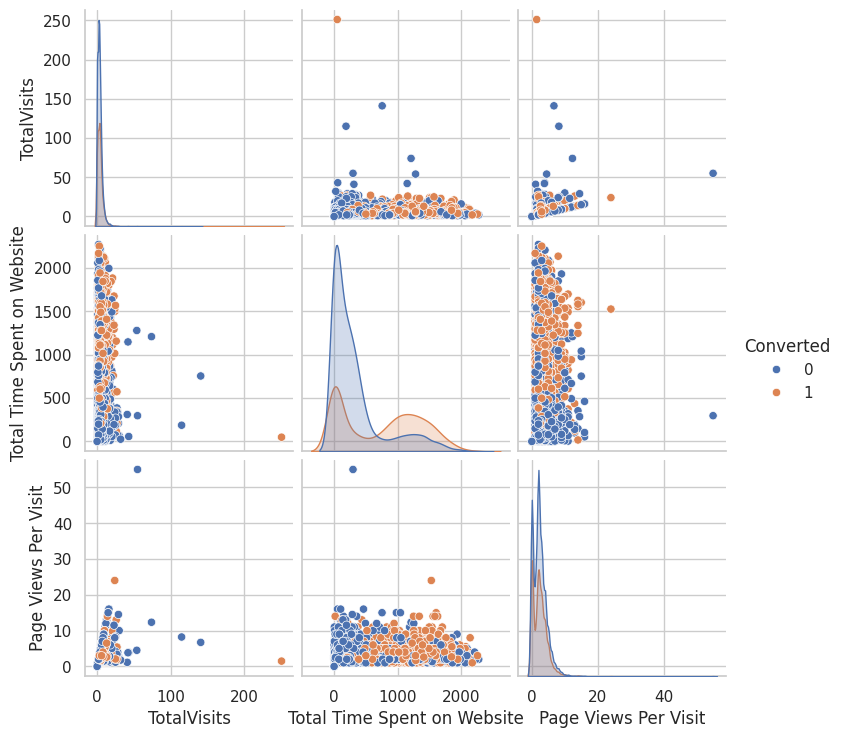

In [ ]:
# Create pairplot of all numeric variables

plt.figure(figsize =[20,20])
sns.pairplot(df0.select_dtypes(include = ['int64','float64']), hue ='Converted', diag_kind = 'kde')
plt.show()

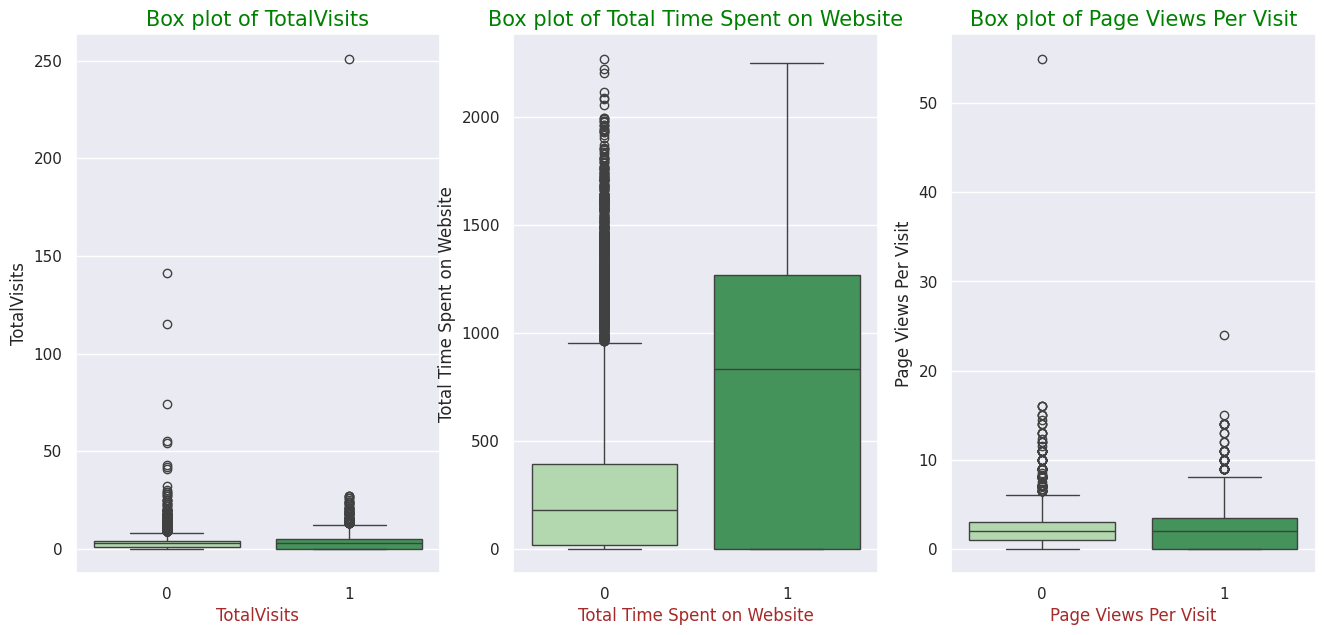

In [ ]:
#Box plot of selected numeric columns

cols_to_check = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

sns.set(font_scale = 1)
plt.figure(figsize=[16,7])

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(1,3,i)
    title_text = f'Box plot of {col}'
    x_label = f'{col}'
    fig = sns.boxplot(data = df0, y = col, x = 'Converted', palette = 'Greens')
    fig.set_title(title_text, fontdict = { 'fontsize': 15, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict = {'fontsize': 12, 'color': 'Brown'})

## **Inferences 1:**  

1. **Time Spent & Conversion:**  
   - The median **'Total Time Spent on Website'** is significantly higher for converted leads.  
   - The sales team should prioritize leads who spend more time on the website, as they have a higher likelihood of conversion.  

2. **High Visits but No Conversion:**  
   - Many **non-converted leads** have a high number of website visits.  
   - Possible reasons:  
     - Financial constraints  
     - Searching for courses not offered by X Education  
     - Better alternatives from competitors  
   - The team should analyze and address these factors.  

3. **Outliers in 'Total Time Spent on Website':**  
   - There are multiple outliers for **Converted = 0** in this column, indicating unusual browsing behavior.  


### Removing Outliers

In [ ]:
# Check percentile values for 'Page Views Per Visit'

df0['Page Views Per Visit'].quantile([.01,.05,.5,.75,.9,.95,.99,1]).values

array([ 0.,  0.,  2.,  3.,  5.,  6.,  9., 55.])

In [ ]:
# Remove observations having Page Views Per Visit > 9

df0 = df0[~(df0['Page Views Per Visit'] > 9)]

In [ ]:
# Check percentile values for 'TotalVisits'

df0['TotalVisits'].quantile([.01,.05,.5,.75,.9,.95,.99,1]).values

array([  0.  ,   0.  ,   3.  ,   5.  ,   7.  ,   9.  ,  16.73, 251.  ])

In [ ]:
# Remove observations having TotalVisits > 16.93

df0 = df0[~(df0['TotalVisits'] > 16.93)]

In [ ]:
# Check percentile values for 'Total Time Spent on Website'

df0['Total Time Spent on Website'].quantile([.01,.05,.5,.75,.9,.95,.99,1]).values

array([   0.  ,    0.  ,  246.  ,  930.  , 1378.  , 1558.35, 1840.27,
       2272.  ])

In [ ]:
# Remove observations having 'Total Time Spent on Website' > 1840.27

df0 = df0[~(df0['Total Time Spent on Website'] > 1840.27)]

In [ ]:
# Calculate % of observation dropped as outlier

print('% of observation dropped as outlier:', 100 - (df0.shape[0] * 100/ 9240))

% of observation dropped as outlier: 2.7813852813852833


We have removed outliers ~ 2.8% of total data (less than 5%)

### Visualizing Categorical Variables

In [ ]:
# Enlist all relevant categorical columns
cat_cols = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Last Activity', 'Country',
       'Specialization', 'Occupation',
       'Reason_choosing', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity', 'Tags']

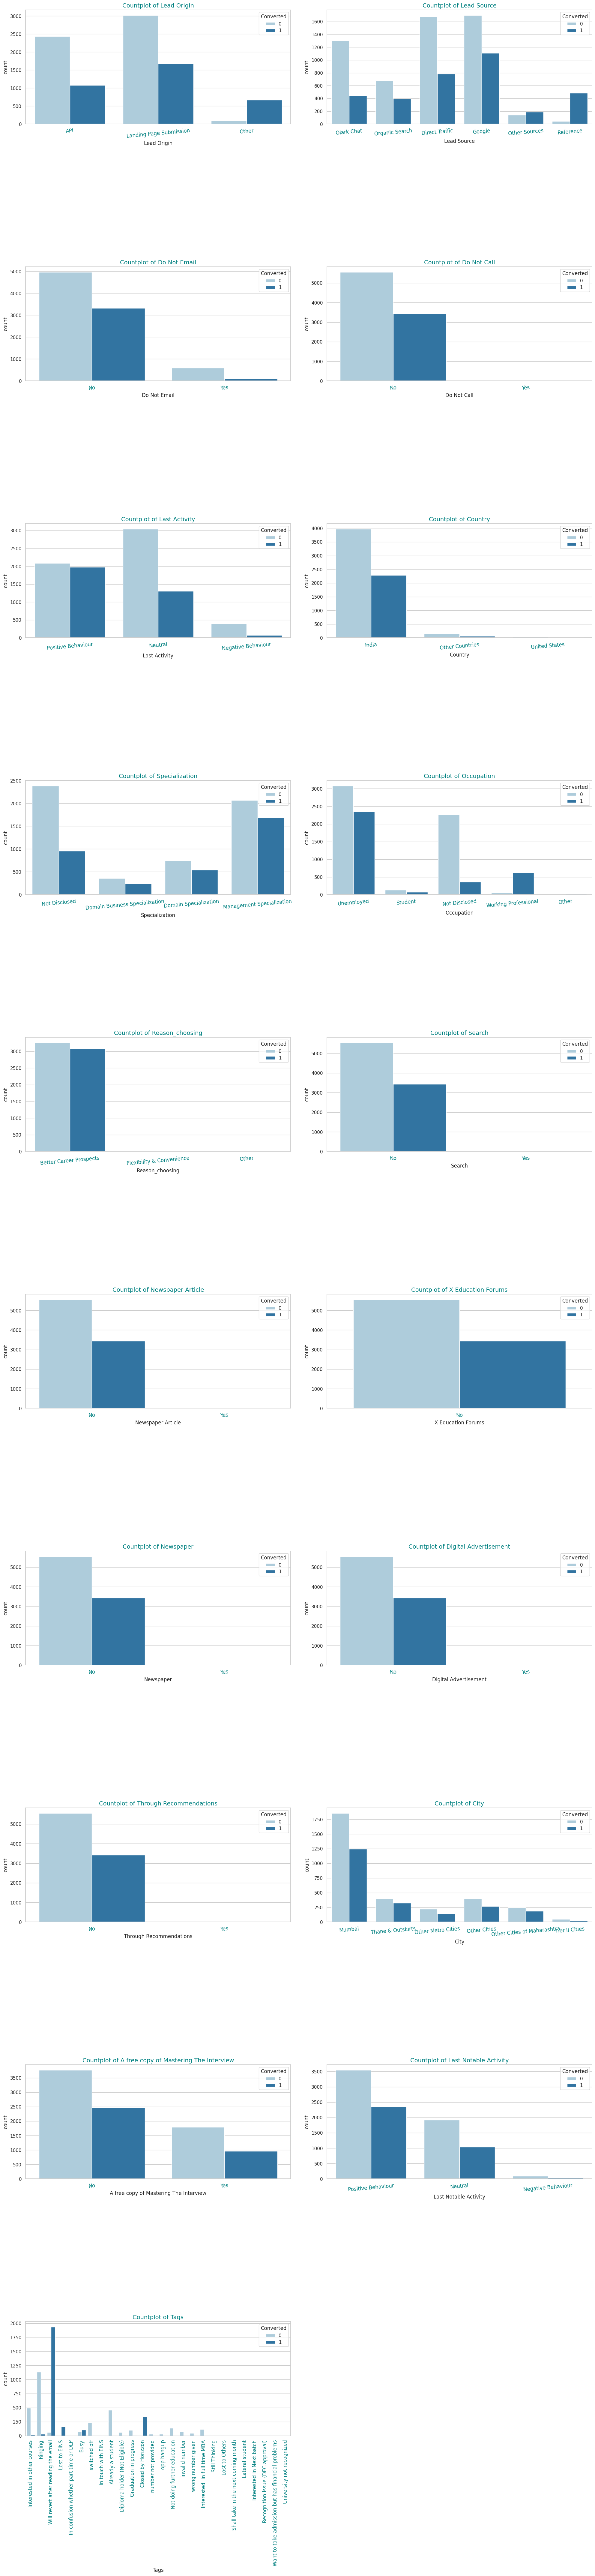

In [ ]:
sns.set_style("whitegrid")
sns.color_palette("husl", 8)
plt.figure(figsize = [20, 90])

for i, cat_col in enumerate(cat_cols, 1):
    ax = plt.subplot(11, 2, i)
    title_text = f'Countplot of {cat_col}'

    sns.countplot(data = df0, x = cat_col, hue = 'Converted', palette = 'Paired', ax = ax)

    ax.set_title(title_text, fontsize = 14, color = 'Teal')

    # Adjust x-axis labels
    rotation_angle = 90 if cat_col == 'Tags' else 5
    plt.xticks(rotation = rotation_angle, fontsize=12, color='Teal')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## **Inferences 2:**  

1. **Lead Origin:**  
   - Leads from the **'Other'** category have a **very high conversion rate**.  

2. **Lead Source:**  
   - **'Reference'** leads have the highest success rate—these should be prioritized.  
   - **'Other Sources'** contribute fewer leads but have a strong conversion rate.  
   - Leads from **'Organic Search'** also show a higher likelihood of conversion.  

3. **Last Activity & Conversion:**  
   - Leads with **'Positive Behavior'** in **'Last Activity'** have a significantly higher conversion rate.  

4. **Demographics:**  
   - Majority of customers are from **India** and have **Management Specializations**.  

5. **Specialization Disclosure:**  
   - Leads who **mention their specialization** have a higher probability of enrolling in a course.  

6. **Employment Status & Conversion:**  
   - Most interested customers are **Unemployed**, but **Working Professionals** have a much higher **conversion rate**.  
   - The sales team should target **more Working Professionals** through dedicated campaigns.  

7. **Employment Status Disclosure:**  
   - Leads who **mention their employment status** during sign-up have a higher conversion probability.  


# Data Preparation

In [ ]:
df1 = df0.copy()
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Positive Behaviour
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Ringing,NaN,No,Neutral
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Neutral
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Ringing,Mumbai,No,Positive Behaviour
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Positive Behaviour


In [ ]:
df1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'Occupation', 'Reason_choosing', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
## Let's drop unnecessary columns and columns generated by the Sales Team
df1.drop(['Last Activity','Last Notable Activity','Tags', 'Prospect ID', 'Lead Number'], axis = 1, inplace= True)
df1.shape

(8983, 20)

### Train Test Split

In [ ]:
# Perform train-test split - 70:30

y = df1.pop('Converted')
X = df1
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 100)

In [ ]:
X_train.shape, y_train.shape

((6288, 19), (6288,))

## **Statistical Imputation for Missing Values**  

- We have already imputed missing values for some columns using **Business Knowledge**.  
- For the remaining features, we will apply **Statistical Imputation**:  
  - **Categorical Features:** Impute missing values with the **mode**.  
  - **Continuous Features:** Impute missing values with the **median**.  

This ensures a consistent and data-driven approach to handling missing values.  


In [ ]:
# Check missing value in different columns

df1.isna().sum()

,0
Lead Origin,0
Lead Source,35
Do Not Email,0
Do Not Call,0
TotalVisits,133
Total Time Spent on Website,0
Page Views Per Visit,133
Country,2454
Specialization,0
Occupation,0


In [ ]:
# Impute Lead Source in train and test data with mode value calculated on train data only

lead_source_imputer = X_train['Lead Source'].mode()[0]
X_train['Lead Source'].fillna(lead_source_imputer, inplace= True)
X_test['Lead Source'].fillna(lead_source_imputer, inplace= True)

In [ ]:
# Impute Country in train and test data with mode value calculated on train data only

country_imputer = X_train['Country'].mode()[0]
X_train.Country.fillna(country_imputer, inplace= True)
X_test.Country.fillna(country_imputer, inplace= True)

In [ ]:
# Impute 'Reason_choosing' in train and test data with mode value calculated on train data only

reason_imputer = X_train['Reason_choosing'].mode()[0]
X_train['Reason_choosing'].fillna(reason_imputer, inplace= True)
X_test['Reason_choosing'].fillna(reason_imputer, inplace= True)

In [ ]:
# Impute City in train and test data with mode value calculated on train data only

city_imputer = X_train['City'].mode()[0]
X_train.City.fillna(city_imputer, inplace= True)
X_test.City.fillna(city_imputer, inplace= True)

In [ ]:
# Impute TotalVisits in train and test data with median value calculated on train data only

total_visit_imputer = X_train['TotalVisits'].median()
X_train.TotalVisits.fillna(total_visit_imputer, inplace= True)
X_test.TotalVisits.fillna(total_visit_imputer, inplace= True)

In [ ]:
# Impute 'Page Views Per Visit' in train and test data with median value calculated on train data only

pageview_imputer = X_train['Page Views Per Visit'].median()
X_train['Page Views Per Visit'].fillna(pageview_imputer, inplace= True)
X_test['Page Views Per Visit'].fillna(pageview_imputer, inplace= True)

In [ ]:
# Check missing value in X_train
X_train.isna().any()

,0
Lead Origin,False
Lead Source,False
Do Not Email,False
Do Not Call,False
TotalVisits,False
Total Time Spent on Website,False
Page Views Per Visit,False
Country,False
Specialization,False
Occupation,False


In [ ]:
# Check missing value in X_test

X_test.isna().any()

,0
Lead Origin,False
Lead Source,False
Do Not Email,False
Do Not Call,False
TotalVisits,False
Total Time Spent on Website,False
Page Views Per Visit,False
Country,False
Specialization,False
Occupation,False


## **Encoding Binary Categorical Columns**  

The following columns contain only **'Yes'** and **'No'** values:  

- **Do Not Email**  
- **Do Not Call**  
- **Search**  
- **Newspaper Article**  
- **X Education Forums**  
- **Newspaper**  
- **Digital Advertisement**  
- **Through Recommendations**  
- **A free copy of Mastering The Interview**  

### **Action Taken:**  
- Replace **'Yes'** with **1**  
- Replace **'No'** with **0**  

This transformation converts categorical values into a numerical format suitable for model training.  


### Encoding Categorical Variables

In [ ]:
# Perform encoding for binary categorical columns

binary_class_cols = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

X_test[binary_class_cols] = X_test[binary_class_cols].replace({'No': 0, 'Yes': 1})
X_train[binary_class_cols] = X_train[binary_class_cols].replace({'No': 0, 'Yes': 1})

In [ ]:
# Perform get_dummies() for rest of the nominal categorical columns

multi_cat_cols = ['Lead Origin','Lead Source','Country', 'Specialization', 'Reason_choosing', 'Occupation', 'City']

dummy_train = pd.get_dummies(X_train[multi_cat_cols], drop_first = True)
dummy_test = pd.get_dummies(X_test[multi_cat_cols], drop_first = True)

In [ ]:
# Join dummy_train dataframe with X_train and droping original columns

X_train= X_train.merge(dummy_train, how = 'inner', left_index = True, right_index = True)
X_train.drop(multi_cat_cols, axis=1, inplace= True)
X_train.shape

(6288, 34)

In [ ]:
# Join dummy_test dataframe with X_test and droping original columns

X_test = X_test.merge(dummy_test, how = 'inner', left_index= True, right_index = True)
X_test.drop(multi_cat_cols, axis=1, inplace= True)
X_test.shape

(2695, 34)

### Performing MinMax Scaling on Train Data

In [ ]:
# Perform MinMax Scaling on all numeric predictors

cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler= MinMaxScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_train[cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7584,0.1875,0.231104,0.166667
671,0.0625,0.266993,0.111111
1676,0.6250,0.615008,0.555556
2161,0.3125,0.939641,0.555556
6976,0.0000,0.000000,0.000000


In [ ]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Reason_choosing_Flexibility & Convenience,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7584,0,0,0.1875,0.231104,0.166667,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
671,0,0,0.0625,0.266993,0.111111,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
1676,0,0,0.6250,0.615008,0.555556,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
2161,0,0,0.3125,0.939641,0.555556,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
6976,0,0,0.0000,0.000000,0.000000,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False


### Performing Variance Thresholding

In [ ]:
# Performing Variance Thresholding and removing columns having lower variance than threshold

var_t = VarianceThreshold(threshold= .001)
variance_thresh = var_t.fit(X_train)
col_ind= var_t.get_support()

# Below columns have very low variance
X_train.loc[:, ~col_ind].columns

Index(['Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Reason_choosing_Flexibility & Convenience'],
      dtype='object')

In [ ]:
# Remove above columns from train and test dataset

X_train = X_train.loc[:, col_ind]
X_test = X_test.loc[:, col_ind]

In [ ]:
X_train.shape

(6288, 27)

In [ ]:
X_test.shape

(2695, 27)

### Checking pairwise correlation

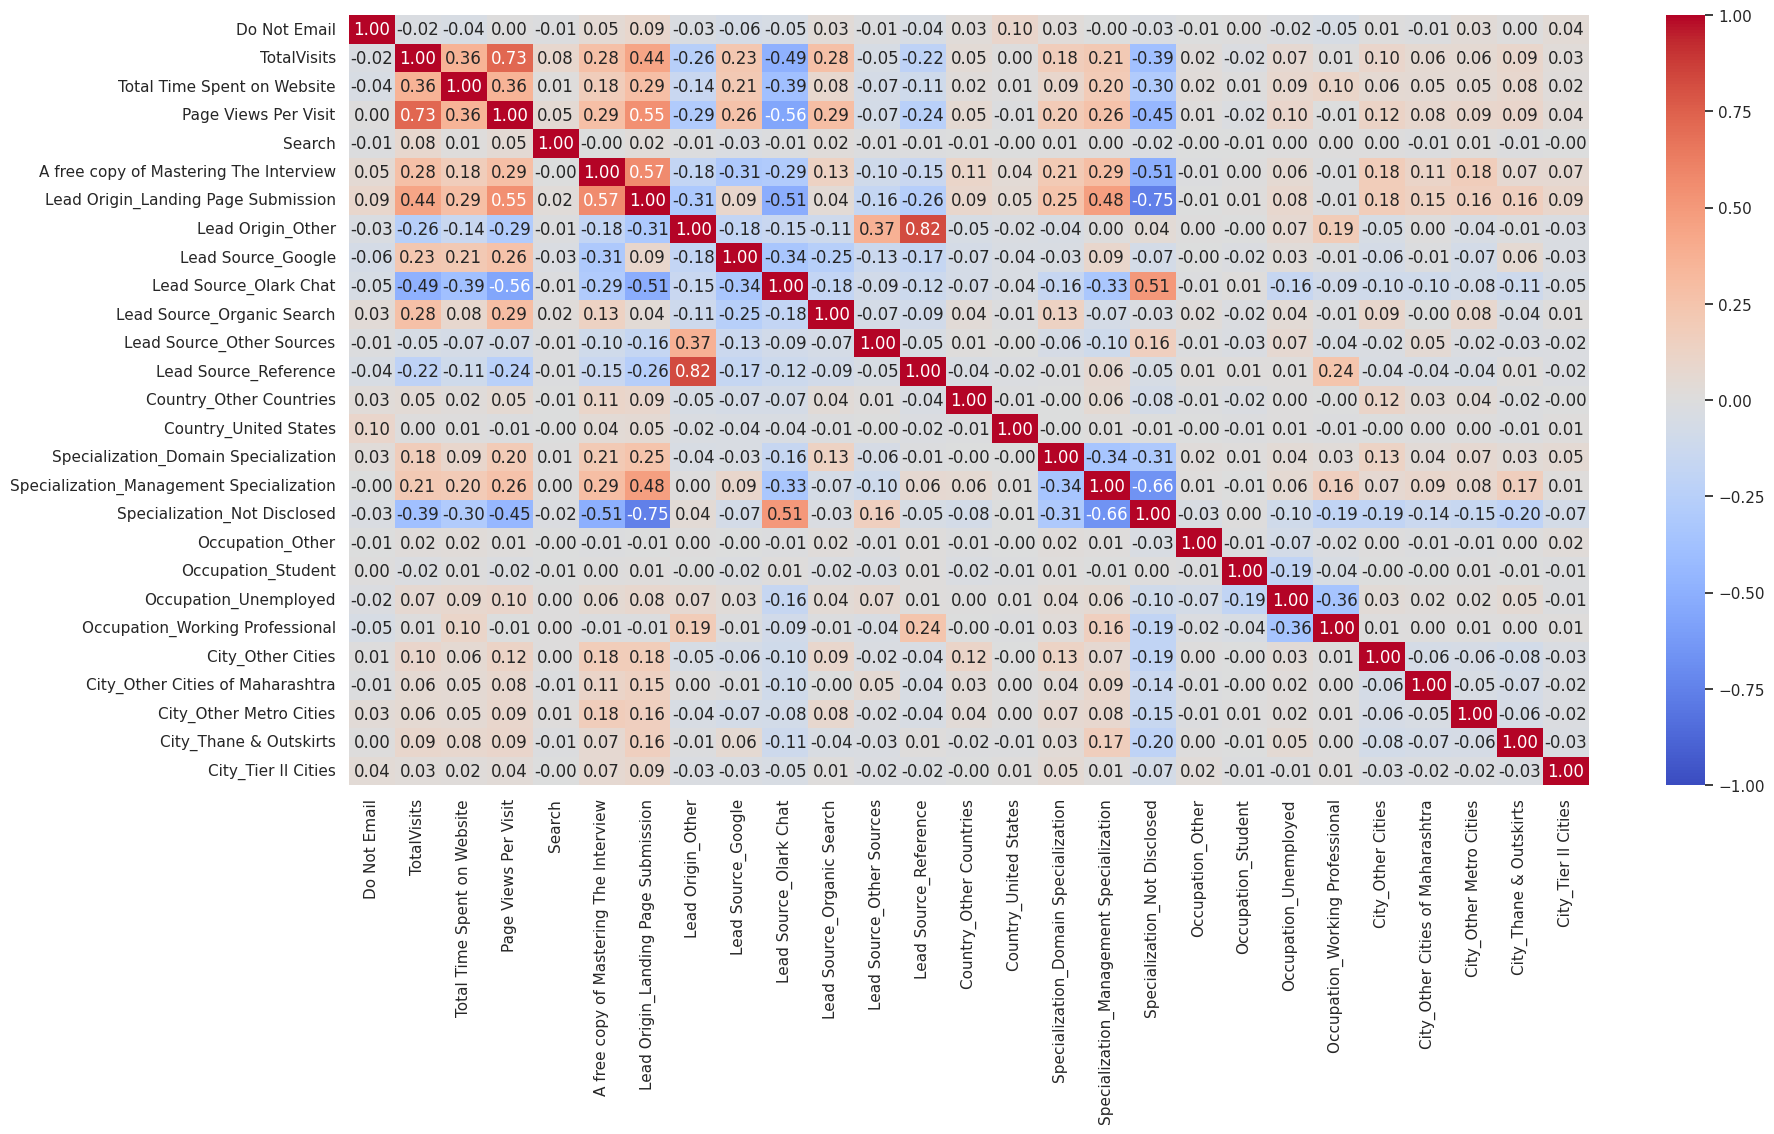

In [ ]:
# Create heatmap

plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True, cmap = 'coolwarm', fmt = '.2f', vmin = -1, vmax = 1)
plt.show()

In [ ]:
X_test.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Lead Source_Reference', 'Country_Other Countries',
       'Country_United States', 'Specialization_Domain Specialization',
       'Specialization_Management Specialization',
       'Specialization_Not Disclosed', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object')

## **Handling High Correlation**  

To avoid multicollinearity, we will drop the following columns:  

1. **'Lead Source_Reference'**  
   - It has a **high correlation (0.82)** with **'Lead Origin_Other'**.  

2. **'Specialization_Not Disclosed'**  
   - It has a **high correlation** with **'Lead Origin_Landing Page Submission'**.  

Dropping these columns ensures that redundant features do not negatively impact the model.  


In [ ]:
# Drop the columns from X_train and X_test

X_train.drop(['Lead Source_Reference','Specialization_Not Disclosed'], axis = 1, inplace= True)
X_test.drop(['Lead Source_Reference','Specialization_Not Disclosed'], axis = 1, inplace= True)

# Model Building

In [ ]:
# Create a fitted model
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

# Run RFE to fing Top 16 Features
rfe = RFE(estimator=lreg, n_features_to_select=16)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# All Features with Rank
all_features = np.array(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
all_features

array([['Do Not Email', 'True', '1'],
       ['TotalVisits', 'True', '1'],
       ['Total Time Spent on Website', 'True', '1'],
       ['Page Views Per Visit', 'True', '1'],
       ['Search', 'False', '9'],
       ['A free copy of Mastering The Interview', 'False', '6'],
       ['Lead Origin_Landing Page Submission', 'True', '1'],
       ['Lead Origin_Other', 'True', '1'],
       ['Lead Source_Google', 'False', '3'],
       ['Lead Source_Olark Chat', 'True', '1'],
       ['Lead Source_Organic Search', 'False', '8'],
       ['Lead Source_Other Sources', 'True', '1'],
       ['Country_Other Countries', 'True', '1'],
       ['Country_United States', 'False', '2'],
       ['Specialization_Domain Specialization', 'True', '1'],
       ['Specialization_Management Specialization', 'True', '1'],
       ['Occupation_Other', 'True', '1'],
       ['Occupation_Student', 'True', '1'],
       ['Occupation_Unemployed', 'True', '1'],
       ['Occupation_Working Professional', 'True', '1'],
       ['Cit

In [ ]:
# Show Top 16 features selected using RFE
top_16_features = list(all_features[all_features[:,1]=='True'][:,0])
top_16_features

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Other',
 'Lead Source_Olark Chat',
 'Lead Source_Other Sources',
 'Country_Other Countries',
 'Specialization_Domain Specialization',
 'Specialization_Management Specialization',
 'Occupation_Other',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'City_Tier II Cities']

## Building 1st Model Using Top 16 Features

In [ ]:
X_train_final = X_train[top_16_features]
X_train_final.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Country_Other Countries,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Tier II Cities
7584,0,0.1875,0.231104,0.166667,False,False,False,False,False,False,False,False,False,False,False,False
671,0,0.0625,0.266993,0.111111,False,False,False,False,False,False,False,False,False,True,False,False
1676,0,0.6250,0.615008,0.555556,True,False,False,False,False,False,True,False,False,True,False,False
2161,0,0.3125,0.939641,0.555556,True,False,False,False,False,False,True,False,False,True,False,False
6976,0,0.0000,0.000000,0.000000,False,False,True,False,False,False,False,False,False,True,False,False


In [ ]:
bool_cols = ['Lead Origin_Landing Page Submission', 'Lead Origin_Other',
             'Lead Source_Olark Chat', 'Lead Source_Other Sources',
             'Country_Other Countries', 'Specialization_Domain Specialization',
             'Specialization_Management Specialization', 'Occupation_Other',
             'Occupation_Student', 'Occupation_Unemployed',
             'Occupation_Working Professional', 'City_Tier II Cities']

X_train_final[bool_cols] = X_train_final[bool_cols].astype(int)

In [ ]:
X_train_final.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Country_Other Countries,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Tier II Cities
7584,0,0.1875,0.231104,0.166667,0,0,0,0,0,0,0,0,0,0,0,0
671,0,0.0625,0.266993,0.111111,0,0,0,0,0,0,0,0,0,1,0,0
1676,0,0.6250,0.615008,0.555556,1,0,0,0,0,0,1,0,0,1,0,0
2161,0,0.3125,0.939641,0.555556,1,0,0,0,0,0,1,0,0,1,0,0
6976,0,0.0000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
# Build Logistic Regression model using statsmodels

X_train_final = sm.add_constant(X_train_final) # Adding constraints
lreg1 = sm.GLM(y_train, X_train_final, family= sm.families.Binomial())
lreg_model_1 = lreg1.fit() # Fitting the model

In [ ]:
# Check the summary of our first Logistic Regression model
print(lreg_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2808.7
Date:                Tue, 18 Feb 2025   Deviance:                       5617.3
Time:                        17:09:52   Pearson chi2:                 7.48e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3534
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

1. 'City_Tier II Cities' and 'Country_Other Countries' have p value higher than .05. So their coefficient value is not statistically significant.
2. Let's see VIFs, to check if there is any multicollinearity present.

In [ ]:
# Create function to calculate VIFs

def vif_calculation(X_df):
    vif = pd.DataFrame()
    X = X_df.drop('const', axis= 1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return (vif.sort_values('VIF', ascending= False))

In [ ]:
# Calculate the VIFs for the 1st model

vif_calculation(X_train_final)

,Features,VIF
3,Page Views Per Visit,6.06
4,Lead Origin_Landing Page Submission,5.04
1,TotalVisits,4.78
10,Specialization_Management Specialization,3.68
13,Occupation_Unemployed,2.82
2,Total Time Spent on Website,2.20
9,Specialization_Domain Specialization,1.92
5,Lead Origin_Other,1.66
14,Occupation_Working Professional,1.43
7,Lead Source_Other Sources,1.25


## **Handling Multicollinearity**  

- **'Page Views Per Visit'** and **'Lead Origin_Landing Page Submission'** have slightly higher **VIF** but are within an acceptable range.  
- **'City_Tier II Cities'** has a **high p-value**, indicating it is not statistically significant.  

### **Action Taken:**  
- **Drop 'City_Tier II Cities'** first.  
- Re-evaluate **VIF values** before making further adjustments.  

This approach helps maintain model stability while preserving important predictors.  


In [ ]:
# Create a function to show Confusion matrix and over all model accuracy

def get_metrics(X_train_final, lreg_model):
    y_train_pred = pd.DataFrame(lreg_model.predict(X_train_final), columns=['prob'])
    y_train_pred['pred_Converted'] = y_train_pred.prob.map(lambda x: 1 if x > 0.5 else 0) # Setting decision margin at .5
    y_train_pred = y_train_pred.merge(y_train, how = 'inner', left_index= True, right_index= True)
    # Get Confusion matrix
    tn,fp,fn,tp= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted).ravel()
    print('Confusion Matrix:')
    print('True Negative:',tn, '    ','False Positive:',fp)
    print('False Negative:',fn,'    ','True Positive:',tp, '\n')
    # Checking the overall model accuracy
    print('Overall model accuracy:', accuracy_score(y_true = y_train_pred.Converted, y_pred = y_train_pred.pred_Converted))

In [ ]:
# Check model evaluation metrics

get_metrics(X_train_final, lreg_model = lreg_model_1)

Confusion Matrix:
True Negative: 3458      False Positive: 433
False Negative: 828      True Positive: 1569 

Overall model accuracy: 0.7994592875318066


## Build 2nd Model

In [ ]:
# Remove 'City_Tier II Cities' from predictor
X_train_final.drop('City_Tier II Cities', axis = 1, inplace = True)

# Check X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Country_Other Countries,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,1.0,0,0.1875,0.231104,0.166667,0,0,0,0,0,0,0,0,0,0,0
671,1.0,0,0.0625,0.266993,0.111111,0,0,0,0,0,0,0,0,0,1,0
1676,1.0,0,0.6250,0.615008,0.555556,1,0,0,0,0,0,1,0,0,1,0
2161,1.0,0,0.3125,0.939641,0.555556,1,0,0,0,0,0,1,0,0,1,0
6976,1.0,0,0.0000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
# Build 2nd Logistic Regression model using statsmodels

lreg2= sm.GLM(y_train, X_train_final, family = sm.families.Binomial())
lreg_model_2 = lreg2.fit() # Fitting the model

# Check the summary of our 2nd Logistic Regression model
print(lreg_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2809.3
Date:                Tue, 18 Feb 2025   Deviance:                       5618.6
Time:                        17:09:52   Pearson chi2:                 7.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3532
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

## **Checking Statistical Significance & Multicollinearity**  

1. **'Country_Other Countries'**  
   - Has a **p-value > 0.05**, meaning its coefficient is **not statistically significant**.  
   - This feature may not contribute meaningfully to the model.  

2. **Multicollinearity Check:**  
   - We'll examine **VIF values** to identify any multicollinearity issues before deciding on further feature removal.  


In [ ]:
# Calculate the VIFs for the 2nd model

vif_calculation(X_train_final)

,Features,VIF
3,Page Views Per Visit,6.06
4,Lead Origin_Landing Page Submission,5.01
1,TotalVisits,4.78
10,Specialization_Management Specialization,3.68
13,Occupation_Unemployed,2.82
2,Total Time Spent on Website,2.20
9,Specialization_Domain Specialization,1.92
5,Lead Origin_Other,1.66
14,Occupation_Working Professional,1.43
7,Lead Source_Other Sources,1.25


## **Refining Predictors to Improve Model Stability**  

- **'Page Views Per Visit'** and **'Lead Origin_Landing Page Submission'** still have slightly high **VIF**, but within an acceptable range.  
- **'Country_Other Countries'** has a **high p-value**, making it statistically insignificant.  

### **Action Taken:**  
- **Drop 'Country_Other Countries'** first.  
- Recalculate **VIF values** to reassess multicollinearity.  

This ensures we retain only the most relevant features for the model.  


In [ ]:
# Check model evaluation metrics

get_metrics(X_train_final, lreg_model = lreg_model_2)

Confusion Matrix:
True Negative: 3458      False Positive: 433
False Negative: 828      True Positive: 1569 

Overall model accuracy: 0.7994592875318066


There is no change in Confusion matrix and in overall model accuracy.

## Building 3rd Model

In [ ]:
# Remove 'Country_Other Countries' from predictor
X_train_final.drop('Country_Other Countries', axis = 1, inplace = True)

# Check X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,1.0,0,0.1875,0.231104,0.166667,0,0,0,0,0,0,0,0,0,0
671,1.0,0,0.0625,0.266993,0.111111,0,0,0,0,0,0,0,0,1,0
1676,1.0,0,0.6250,0.615008,0.555556,1,0,0,0,0,1,0,0,1,0
2161,1.0,0,0.3125,0.939641,0.555556,1,0,0,0,0,1,0,0,1,0
6976,1.0,0,0.0000,0.000000,0.000000,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Build 3rd Logistic Regression model using statsmodels

lreg3 = sm.GLM(y_train, X_train_final, family = sm.families.Binomial())
lreg_model_3 = lreg3.fit() # Fitting the model

# Check the summary of our 3rd Logistic Regression model
print(lreg_model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2811.2
Date:                Tue, 18 Feb 2025   Deviance:                       5622.4
Time:                        17:09:53   Pearson chi2:                 7.46e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3528
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

All beta coefficients are now statistically significant.

In [ ]:
# Calculate the VIFs for the 3rd model

vif_calculation(X_train_final)

,Features,VIF
3,Page Views Per Visit,6.06
4,Lead Origin_Landing Page Submission,5.00
1,TotalVisits,4.78
9,Specialization_Management Specialization,3.68
12,Occupation_Unemployed,2.82
2,Total Time Spent on Website,2.20
8,Specialization_Domain Specialization,1.92
5,Lead Origin_Other,1.66
13,Occupation_Working Professional,1.43
7,Lead Source_Other Sources,1.25


'Page Views Per Visit' still has bit higher VIF value, We'll drop it and will check again.

In [ ]:
# Check model evaluation metrics

get_metrics(X_train_final, lreg_model = lreg_model_3)

Confusion Matrix:
True Negative: 3454      False Positive: 437
False Negative: 824      True Positive: 1573 

Overall model accuracy: 0.7994592875318066


## **Model Comparison**  

- Compared to **Model 2**, the confusion matrix shows **a slight increase in TP** and a **corresponding decrease in TN**.  
- Overall, there is **no significant change** in model accuracy.  


## Building 4th model

In [ ]:
# Remove 'Page Views Per Visit'  from predictor
X_train_final.drop('Page Views Per Visit' , axis = 1, inplace = True)

# Check X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,1.0,0,0.1875,0.231104,0,0,0,0,0,0,0,0,0,0
671,1.0,0,0.0625,0.266993,0,0,0,0,0,0,0,0,1,0
1676,1.0,0,0.6250,0.615008,1,0,0,0,0,1,0,0,1,0
2161,1.0,0,0.3125,0.939641,1,0,0,0,0,1,0,0,1,0
6976,1.0,0,0.0000,0.000000,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Build 4th Logistic Regression model using statsmodels

lreg4= sm.GLM(y_train, X_train_final, family = sm.families.Binomial())
lreg_model_4 = lreg4.fit() # Let's the model

# Check the summary of our 4th Logistic Regression model
print(lreg_model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2813.3
Date:                Tue, 18 Feb 2025   Deviance:                       5626.6
Time:                        17:09:53   Pearson chi2:                 7.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3524
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
# Calculate the VIFs for the 4th model

vif_calculation(X_train_final)

,Features,VIF
3,Lead Origin_Landing Page Submission,4.69
8,Specialization_Management Specialization,3.67
1,TotalVisits,2.87
11,Occupation_Unemployed,2.74
2,Total Time Spent on Website,2.18
7,Specialization_Domain Specialization,1.92
4,Lead Origin_Other,1.64
12,Occupation_Working Professional,1.43
6,Lead Source_Other Sources,1.24
5,Lead Source_Olark Chat,1.20


## **Finalizing Predictors**  

- **p-values** of all beta coefficients are now within an acceptable range, confirming their **statistical significance**.  
- **'Lead Origin_Landing Page Submission'** has a slightly higher **VIF** (but still <5).  

### **Next Step:**  
- Drop **'Lead Origin_Landing Page Submission'** in the next model.  
- Evaluate if this impacts overall model accuracy.  
- If accuracy remains stable, removing it would be preferable to reduce multicollinearity.  


In [ ]:
# Check model evaluation metrics

get_metrics(X_train_final, lreg_model = lreg_model_4)

Confusion Matrix:
True Negative: 3455      False Positive: 436
False Negative: 826      True Positive: 1571 

Overall model accuracy: 0.7993002544529262


Model accuracy is still almost same as in Model 3.

## Building 5th model

In [ ]:
# Remove 'Lead Origin_Landing Page Submission'  from predictor
X_train_final.drop('Lead Origin_Landing Page Submission' , axis = 1, inplace= True)

# Check X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,1.0,0,0.1875,0.231104,0,0,0,0,0,0,0,0,0
671,1.0,0,0.0625,0.266993,0,0,0,0,0,0,0,1,0
1676,1.0,0,0.6250,0.615008,0,0,0,0,1,0,0,1,0
2161,1.0,0,0.3125,0.939641,0,0,0,0,1,0,0,1,0
6976,1.0,0,0.0000,0.000000,0,1,0,0,0,0,0,1,0


In [ ]:
# Build 5th Logistic Regression model using statsmodels

lreg5= sm.GLM(y_train, X_train_final, family = sm.families.Binomial())
lreg_model_5= lreg5.fit() # Fitting the model

# Check the summary of our 5th Logistic Regression model
print(lreg_model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.9
Date:                Tue, 18 Feb 2025   Deviance:                       5645.7
Time:                        17:09:53   Pearson chi2:                 7.40e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3504
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
# Calculate the VIFs for the 5th model

vif_calculation(X_train_final)

,Features,VIF
1,TotalVisits,2.70
10,Occupation_Unemployed,2.68
7,Specialization_Management Specialization,2.27
2,Total Time Spent on Website,2.16
3,Lead Origin_Other,1.50
6,Specialization_Domain Specialization,1.46
11,Occupation_Working Professional,1.42
5,Lead Source_Other Sources,1.24
4,Lead Source_Olark Chat,1.17
0,Do Not Email,1.06


## **Addressing Multicollinearity & Statistical Significance**  

- After removing **'Lead Origin_Landing Page Submission'**, the **VIF of 'Specialization_Management Specialization'** has significantly decreased.  
- Now, the model has **no multicollinearity issues**.  
- However, the **p-value of 'Specialization_Domain Specialization'** is now **> 0.05**, making it statistically insignificant.  

### **Next Step:**  
- Drop **'Specialization_Domain Specialization'** in the next model.  
- Reassess model performance and statistical significance.  


In [ ]:
# Check model evaluation metrics

get_metrics(X_train_final, lreg_model = lreg_model_5)

Confusion Matrix:
True Negative: 3445      False Positive: 446
False Negative: 825      True Positive: 1572 

Overall model accuracy: 0.7978689567430025


Model 5 has almost same overall accuracy as our previous model.

## Building 6th model

In [ ]:
# Remove 'Specialization_Domain Specialization'  from predictor

X_train_final.drop('Specialization_Domain Specialization' , axis = 1, inplace = True)

# Check X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,1.0,0,0.1875,0.231104,0,0,0,0,0,0,0,0
671,1.0,0,0.0625,0.266993,0,0,0,0,0,0,1,0
1676,1.0,0,0.6250,0.615008,0,0,0,1,0,0,1,0
2161,1.0,0,0.3125,0.939641,0,0,0,1,0,0,1,0
6976,1.0,0,0.0000,0.000000,0,1,0,0,0,0,1,0


In [ ]:
# Build 6th Logistic Regression model using statsmodels

lreg6 = sm.GLM(y_train, X_train_final, family = sm.families.Binomial())
lreg_model_6 = lreg6.fit() # Fitting the model

# Check the summary of our 6th Logistic Regression model
print(lreg_model_6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2823.9
Date:                Tue, 18 Feb 2025   Deviance:                       5647.7
Time:                        17:09:54   Pearson chi2:                 7.40e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3502
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
# Calculate the VIFs for the 6th model

vif_calculation(X_train_final)

,Features,VIF
9,Occupation_Unemployed,2.55
1,TotalVisits,2.48
2,Total Time Spent on Website,2.15
6,Specialization_Management Specialization,1.88
3,Lead Origin_Other,1.49
10,Occupation_Working Professional,1.39
5,Lead Source_Other Sources,1.23
4,Lead Source_Olark Chat,1.16
0,Do Not Email,1.06
8,Occupation_Student,1.06


## **Refining Predictor Variables**  

- **Multicollinearity is no longer present** in the model.  
- The **p-value of 'Specialization_Management Specialization'** is now **> 0.05**, making its beta coefficient statistically insignificant.  

### **Next Step:**  
- Drop **'Specialization_Management Specialization'** in the next model.  
- Re-evaluate model performance.  


In [ ]:
# Check model evaluation metrics

get_metrics(X_train_final, lreg_model = lreg_model_6)

Confusion Matrix:
True Negative: 3445      False Positive: 446
False Negative: 828      True Positive: 1569 

Overall model accuracy: 0.7973918575063613


Even after droping 'Specialization_Management Specialization' there is no significance change in our overall model accuracy.

## Building 7th model

In [ ]:
# Remove 'Specialization_Management Specialization'  from predictor

X_train_final.drop('Specialization_Management Specialization' , axis = 1, inplace = True)

# Check X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,1.0,0,0.1875,0.231104,0,0,0,0,0,0,0
671,1.0,0,0.0625,0.266993,0,0,0,0,0,1,0
1676,1.0,0,0.6250,0.615008,0,0,0,0,0,1,0
2161,1.0,0,0.3125,0.939641,0,0,0,0,0,1,0
6976,1.0,0,0.0000,0.000000,0,1,0,0,0,1,0


In [ ]:
# Build 7th Logistic Regression model using statsmodels

lreg7= sm.GLM(y_train, X_train_final, family = sm.families.Binomial())
lreg_model_7 = lreg7.fit() # Fitting the model

# Check the summary of our 7th Logistic Regression model
print(lreg_model_7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2825.0
Date:                Tue, 18 Feb 2025   Deviance:                       5649.9
Time:                        17:09:54   Pearson chi2:                 7.36e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3500
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
# Calculate the VIFs for the 7th model

vif_calculation(X_train_final)

,Features,VIF
8,Occupation_Unemployed,2.39
1,TotalVisits,2.34
2,Total Time Spent on Website,2.11
3,Lead Origin_Other,1.49
9,Occupation_Working Professional,1.32
5,Lead Source_Other Sources,1.22
4,Lead Source_Olark Chat,1.16
0,Do Not Email,1.05
7,Occupation_Student,1.05
6,Occupation_Other,1.01


## **Final Model Validation**  

- After dropping **'Specialization_Management Specialization'**, all **beta coefficients are now statistically significant**.  
- **No multicollinearity** is present in the model.  

The model is now well-optimized for prediction. ✅  


In [ ]:
# Check model evaluation metrics

get_metrics(X_train_final, lreg_model= lreg_model_7)

Confusion Matrix:
True Negative: 3453      False Positive: 438
False Negative: 826      True Positive: 1571 

Overall model accuracy: 0.7989821882951654


After droping 'Specialization_Management Specialization' our model accuracy has been improved.

# Calculating other Model Evaluation metrics

Let's calculate different evaluation metrics of our regression model.

In [ ]:
y_train_pred = pd.DataFrame(lreg_model_7.predict(X_train_final), columns=['prob'])
y_train_pred['pred_Converted'] = y_train_pred.prob.map(lambda x: 1 if x > 0.5 else 0) # Setting decision margin at .5
y_train_pred = y_train_pred.merge(y_train, how= 'inner', left_index= True, right_index= True)

# Get Confusion matrix
TN,FP,FN,TP = confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted).ravel()

# Print confusion matrix
print("Confusion Matrix:")
print(f"TN: {TN}  FP: {FP}")
print(f"FN: {FN}  TP: {TP}")


Confusion Matrix:
TN: 3453  FP: 438
FN: 826  TP: 1571


In [ ]:
# Check Overall Model accuracy
print('Overall Model accuracy:', accuracy_score(y_true = y_train_pred.Converted, y_pred = y_train_pred.pred_Converted))

# Check Sensitivity of our final model
print('Sensitivity / Recall: ',TP / float(TP+FN))

# Check Specificity of our final model
print('Specificity: ', TN / float(TN+FP))

# Check FPR (False Positive Rate) of our final model (1- specificity)
print('False Positive Rate: ',FP/ float(TN+FP))

# Check Positive Predictive Value
print('Positive Predictive Value: ',TP / float(TP+FP))

# Check Negative Predictive Value
print('Positive Predictive Value: ',TN / float(TN+ FN))

Overall Model accuracy: 0.7989821882951654
Sensitivity / Recall:  0.6554025865665415
Specificity:  0.887432536622976
False Positive Rate:  0.1125674633770239
Positive Predictive Value:  0.7819810851169736
Positive Predictive Value:  0.8069642439822389


## Plotting the ROC Curve

In [ ]:
# Create a function to plot ROC curve

def roc_plot(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize = (6, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = "lower right")
    plt.show()

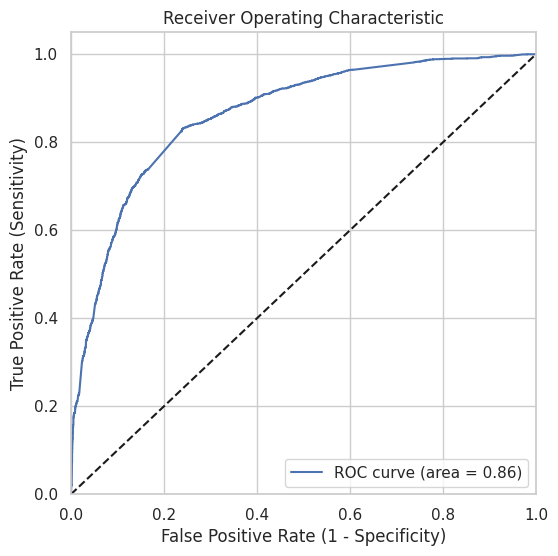

In [ ]:
# Plot the ROC curve

fpr, tpr, thresholds = roc_curve(y_train_pred.Converted, y_train_pred.prob, drop_intermediate = False )
roc_plot(y_train_pred.Converted, y_train_pred.prob)

## Finding Optimal Probability Cutoff Point

### Using Sensitivity-Specificity

In [ ]:
# Create different label columns using different probability cutoffs

num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred[i] =  y_train_pred.prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,prob,pred_Converted,Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7584,0.090048,0,0,1,0,0,0,0,0,0,0,0,0
671,0.278824,0,1,1,1,1,0,0,0,0,0,0,0
1676,0.725382,1,1,1,1,1,1,1,1,1,1,0,0
2161,0.877053,1,1,1,1,1,1,1,1,1,1,1,0
6976,0.335305,0,0,1,1,1,1,0,0,0,0,0,0


In [ ]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.

plot_df= pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

for n in num:
    TN,FP,FN,TP = confusion_matrix(y_true = y_train_pred.Converted, y_pred= y_train_pred[n]).ravel()
    accuracy = (TN+TP)/float(TN+FP+FN+TP)
    specificity = TN / float(TN+FP)
    sensitivity = TP / float(TP+FN)
    plot_df.loc[n] = [n,accuracy,sensitivity,specificity]

plot_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.381202,1.000000,0.000000
0.1,0.1,0.527036,0.984147,0.245438
0.2,0.2,0.711673,0.904047,0.593164
0.3,0.3,0.778467,0.838131,0.741712
0.4,0.4,0.801050,0.707134,0.858905
0.5,0.5,0.798982,0.655403,0.887433
0.6,0.6,0.784828,0.582812,0.909278
0.7,0.7,0.763677,0.486024,0.934721
0.8,0.8,0.732347,0.352941,0.966076
0.9,0.9,0.682093,0.174802,0.994603


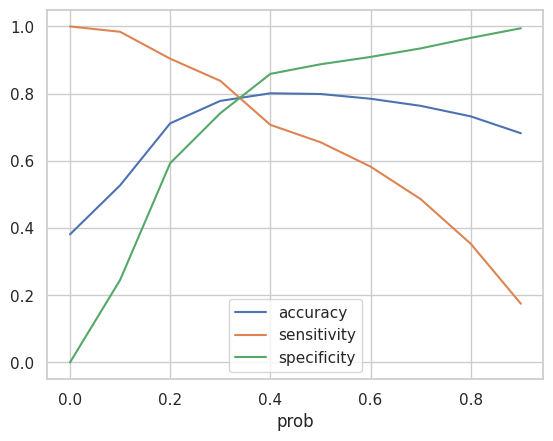

In [ ]:
# Plot Accuracy, Sensitivity and Specificity for different probability cutoffs

plot_df.plot.line(x= 'prob', y= ['accuracy','sensitivity','specificity'])
plt.show()

## **Optimal Cutoff Probability**  

- From the plot, **0.32** appears to be the **optimal cutoff probability** for our model.  
- This threshold balances precision and recall, improving overall model performance.  


### Evaluating final model on train data

In [ ]:
# Create pred_final column and generating prediction based on probability cutoff .32

y_train_pred['pred_final'] = y_train_pred.prob.map(lambda x: 1 if x > .32 else 0)

In [ ]:
print('Model Evaluation Metrics on Train dataset')
print('#'* 50)

# Get the Confusion matrix
TN,FP,FN,TP = confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_final).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')


# Check Overall Model accuracy
print('Overall model accuracy:', accuracy_score(y_true = y_train_pred.Converted, y_pred = y_train_pred.pred_final))

# Check Sensitivity of our final model
print('Sensitivity / Recall: ',TP / float(TP+FN))

# Check Specificity of our final model
print('Specificity: ', TN / float(TN+FP))

# Check FPR (False Positive Rate) of our final model (1- specificity)
print('False Positive Rate: ',FP/ float(TN+FP))

# Check Positive Predictive Value
print('Positive Predictive Value: ',TP / float(TP+FP))

# Check Negative Predictive Value
print('Positive Predictive Value: ',TN / float(TN+ FN))

Model Evaluation Metrics on Train dataset
##################################################
Confusion Matrix:
True Negative: 2946      False Positive: 945
False Negative: 402      True Positive: 1995 

Overall model accuracy: 0.7857824427480916
Sensitivity / Recall:  0.8322903629536921
Specificity:  0.7571318427139553
False Positive Rate:  0.24286815728604472
Positive Predictive Value:  0.6785714285714286
Positive Predictive Value:  0.8799283154121864


### Generating Lead Score on Train dataset

In [ ]:
# Add Lead Number from initial dataframe for better understanding

y_train_pred = y_train_pred.merge(leads_df['Lead Number'], how= 'left', left_index= True, right_index= True)

# Generate Lead Score on Train dataset
y_train_pred['Lead Score'] = y_train_pred.prob * 100
y_train_pred = y_train_pred[['Lead Number', 'Converted', 'pred_Converted', 'prob','Lead Score']].sort_values(
    'Lead Score', ascending= False)
y_train_pred.head(10)

,Lead Number,Converted,pred_Converted,prob,Lead Score
818,651812,1,1,0.999804,99.980378
2656,634047,1,1,0.999693,99.969269
3478,627106,1,1,0.999669,99.966924
6383,600952,1,1,0.999649,99.964935
5921,604411,1,1,0.999364,99.936442
7579,591536,1,1,0.999325,99.932475
6751,598055,1,1,0.999257,99.925736
8081,588013,1,1,0.999058,99.905798
9015,581257,1,1,0.998964,99.896399
120,659283,1,1,0.998851,99.885074


### Evaluating final model on test data

In [ ]:
# Perform MinMax Scaling on test dataset

cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[cols]= scaler.transform(X_test[cols])
X_test[cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7464,0.0000,0.000000,0.000000
987,0.0625,0.443176,0.111111
6975,0.1250,0.077760,0.222222
3406,0.0000,0.000000,0.000000
4500,0.0000,0.000000,0.000000


In [ ]:
# Keep only required columns in our test dataset

test_cols = list(X_train_final.columns)
test_cols.remove('const')
X_test = X_test[test_cols]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7464,0,0.0000,0.000000,False,True,False,False,False,False,False
987,0,0.0625,0.443176,False,False,True,False,False,False,False
6975,1,0.1250,0.077760,False,False,False,False,False,True,False
3406,0,0.0000,0.000000,True,False,True,False,False,True,False
4500,0,0.0000,0.000000,False,True,False,False,False,False,False


In [ ]:
# Add constant in test dataset

X_test_final = sm.add_constant(X_test)
X_test_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7464,1.0,0,0.0000,0.000000,False,True,False,False,False,False,False
987,1.0,0,0.0625,0.443176,False,False,True,False,False,False,False
6975,1.0,1,0.1250,0.077760,False,False,False,False,False,True,False
3406,1.0,0,0.0000,0.000000,True,False,True,False,False,True,False
4500,1.0,0,0.0000,0.000000,False,True,False,False,False,False,False


In [ ]:
# Convert boolean columns in X_test_final to integers (0/1)
bool_cols = ['Lead Origin_Other', 'Lead Source_Olark Chat', 'Lead Source_Other Sources',
             'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
             'Occupation_Working Professional']

X_test_final[bool_cols] = X_test_final[bool_cols].astype(int)

In [ ]:
# Add constant in test dataset

X_test_final = sm.add_constant(X_test)
X_test_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7464,1.0,0,0.0000,0.000000,False,True,False,False,False,False,False
987,1.0,0,0.0625,0.443176,False,False,True,False,False,False,False
6975,1.0,1,0.1250,0.077760,False,False,False,False,False,True,False
3406,1.0,0,0.0000,0.000000,True,False,True,False,False,True,False
4500,1.0,0,0.0000,0.000000,False,True,False,False,False,False,False


In [ ]:
# Convert boolean columns in X_test_final to integers (0/1)
bool_cols = ['Lead Origin_Other', 'Lead Source_Olark Chat', 'Lead Source_Other Sources',
             'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
             'Occupation_Working Professional']

# Ensure all boolean columns are of numeric type
for col in bool_cols:
    X_test_final[col] = pd.to_numeric(X_test_final[col], errors='coerce').astype(int)

# Predict using lreg_model_7 model and storing the probability value into a dataframe
y_test_pred = pd.DataFrame(lreg_model_7.predict(X_test_final), columns=['prob'])
y_test_pred.head()

,prob
7464,0.116755
987,0.102127
6975,0.054350
3406,0.754830
4500,0.116755


In [ ]:
# Predict using lreg_model_7 model and storing the probability value into a dataframe

y_test_pred = pd.DataFrame(lreg_model_7.predict(X_test_final), columns=['prob'])
y_test_pred.head()

,prob
7464,0.116755
987,0.102127
6975,0.054350
3406,0.754830
4500,0.116755


### Generating Lead Score on Test dataset

In [ ]:
# Merge y_test and y_test_pred

y_test_pred = y_test_pred.merge(y_test, how= 'inner', left_index= True, right_index= True)

In [ ]:
# Create prediction based on probability cut off .32
y_test_pred['pred_Converted'] = y_test_pred.prob.map(lambda x: 1 if x> .32 else 0)
y_test_pred.head()

,prob,Converted,pred_Converted
7464,0.116755,0,0
987,0.102127,0,0
6975,0.054350,0,0
3406,0.754830,1,1
4500,0.116755,0,0


In [ ]:
# Add Lead Number from initial dataframe for better understanding
y_test_pred = y_test_pred.merge(leads_df['Lead Number'], how= 'left', left_index= True, right_index= True)

In [ ]:
# Generate Lead Score on Test dataset
y_test_pred['Lead Score'] = y_test_pred.prob * 100
y_test_pred = y_test_pred[['Lead Number', 'Converted', 'pred_Converted', 'prob','Lead Score']].sort_values(
    'Lead Score', ascending = False)
y_test_pred.head(10)

,Lead Number,Converted,pred_Converted,prob,Lead Score
8074,588037,1,1,0.999642,99.964168
3428,627462,1,1,0.999444,99.944417
8063,588075,1,1,0.999068,99.906811
4613,615524,1,1,0.998992,99.899175
2984,631268,1,1,0.998894,99.889355
7187,594369,1,1,0.998119,99.811861
8057,588097,0,1,0.997273,99.727347
79,659710,1,1,0.997238,99.723794
2978,631318,1,1,0.997207,99.720731
739,652787,1,1,0.996684,99.668376


### Evaluating final model on test data

In [ ]:
print('Model Evaluation Metrics on Test dataset')
print('#'* 50)

# Get the Confusion matrix
TN,FP,FN,TP = confusion_matrix(y_true= y_test_pred.Converted, y_pred= y_test_pred.pred_Converted).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')


# Check for the Overall Model accuracy

print('Overall model accuracy:', accuracy_score(y_true= y_test_pred.Converted, y_pred= y_test_pred.pred_Converted))

# Check for Sensitivity of our final model
print('Sensitivity / Recall: ',TP / float(TP+FN))

# Check for Specificity of our final model
print('Specificity: ', TN / float(TN+FP))

# Check for FPR (False Positive Rate) of our final model (1- specificity)
print('False Positive Rate: ',FP/ float(TN+FP))

# Check for Positive Predictive Value
print('Positive Predictive Value: ',TP / float(TP+FP))

# Check for Negative Predictive Value
print('Positive Predictive Value: ',TN / float(TN+ FN))

Model Evaluation Metrics on Test dataset
##################################################
Confusion Matrix:
True Negative: 1258      False Positive: 402
False Negative: 203      True Positive: 832 

Overall model accuracy: 0.7755102040816326
Sensitivity / Recall:  0.8038647342995169
Specificity:  0.7578313253012048
False Positive Rate:  0.2421686746987952
Positive Predictive Value:  0.6742301458670988
Positive Predictive Value:  0.8610540725530459


In [ ]:
# Question 1: Script for the answer

# Access coefficients from the statsmodels summary:
coefficients = lreg_model_7.params

# Create a DataFrame for easier viewing
coef_df = pd.DataFrame({'Variable': coefficients.index, 'Coefficient': coefficients.values})

# Sort by absolute coefficient value to find the most influential
coef_df = coef_df.sort_values(by = 'Coefficient', key = abs, ascending=False)

# Display the top three variables
print(coef_df.head(3))


                           Variable  Coefficient
3       Total Time Spent on Website     3.979086
10  Occupation_Working Professional     3.814033
4                 Lead Origin_Other     3.782189
